# Table of Contents
- [Task 1: Data Preparation](#prep)
- [Error 1](#e1)
- [Error 2](#e2)
- [Error 3](#e3)
- [Error 4](#e4)
- [Error 5](#e5)
- [Error 6](#e6)
- [Write to CSV](#w)
- [Task 2: Data Exploration](#exp)
- [Task 2.1](#21)
- [Task 2.2](#22)
- [Task 2.3](#23)

# Task 1: Data Preparation <a id='prep'></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns

First read 11 CSV files to Python

In [3]:
Manufacturer = pd.read_csv('Manufacturer.csv')
Manufacturer

,Unnamed: 0,Manufacturer
0,0,Ford
1,1,Ford
2,2,Volkswagen
3,3,Renault
4,4,BMW
...,...,...
6097,6097,Land-Rover
6098,6098,Toyota
6099,6099,Alfa-Romeo
6100,6100,Honda


In [4]:
Model = pd.read_csv('Model.csv')
Model

,Unnamed: 0,Model
0,0,Focus
1,1,Fiesta
2,2,Golf
3,3,Clio
4,4,320i
...,...,...
6097,6097,Defender
6098,6098,RAV4
6099,6099,Spider
6100,6100,Shuttle


In [5]:
Price = pd.read_csv('Price.csv')
Price

,Unnamed: 0,Price
0,0,30.619322
1,1,18.532143
2,2,31.242154
3,3,22.100000
4,4,47.848370
...,...,...
6097,6097,108.747195
6098,6098,43.548516
6099,6099,55.200000
6100,6100,30.081000


In [6]:
Transmission = pd.read_csv('Transmission.csv')
Transmission

,Unnamed: 0,Transmission
0,0,5.966102
1,1,5000.714286
2,2,6.164835
3,3,5.615385
4,4,6.444444
...,...,...
6097,6097,7.853659
6098,6098,1.354839
6099,6099,6.000000
6100,6100,4.000000


In [7]:
Power = pd.read_csv('Power.csv')
Power

,Unnamed: 0,Power
0,0,-94.033898
1,1,68.571429
2,2,-89.461538
3,3,75.576923
4,4,126.111111
...,...,...
6097,6097,207.609756
6098,6098,137.774193
6099,6099,163.500000
6100,6100,110.000000


In [8]:
Engine_CC = pd.read_csv('Engine CC.csv')
Engine_CC

,Unnamed: 0,Engine CC
0,0,1497.169492
1,1,1166.142857
2,2,1537.406593
3,3,1219.653846
4,4,1995.777778
...,...,...
6097,6097,2304.975610
6098,6098,2261.193548
6099,6099,2696.500000
6100,6100,2254.000000


In [9]:
Fuel = pd.read_csv('Fuel.csv')
Fuel

,Unnamed: 0,Fuel
0,0,petrol
1,1,petrol
2,2,petrol
3,3,petrol
4,4,petrol
...,...,...
6097,6097,diesel
6098,6098,petrol
6099,6099,petrol
6100,6100,petrol


In [10]:
Male = pd.read_csv('Male.csv')
Male

,Unnamed: 0,Male
0,0,814172
1,1,554879
2,2,483216
3,3,241287
4,4,408016
...,...,...
6097,6097,"1,012"
6098,6098,670
6099,6099,790
6100,6100,639


In [11]:
Female = pd.read_csv('Female.csv')
Female

,Unnamed: 0,Female
0,0,422731
1,1,631666
2,2,310604
3,3,312556
4,4,115843
...,...,...
6097,6097,150
6098,6098,482
6099,6099,247
6100,6100,416


In [12]:
Unknown = pd.read_csv('Unknown.csv')
Unknown

,Unnamed: 0,Unknown
0,0,"56,487"
1,1,"54,057"
2,2,"47,563"
3,3,"28,004"
4,4,"29,125"
...,...,...
6097,6097,80
6098,6098,66
6099,6099,81
6100,6100,49


In [13]:
Total = pd.read_csv('Total.csv')
Total

,Unnamed: 0,Total
0,0,1293390
1,1,1240602
2,2,841383
3,3,581847
4,4,552984
...,...,...
6097,6097,"1,242"
6098,6098,"1,218"
6099,6099,"1,118"
6100,6100,"1,104"


Then, merge 11 csv files into a single data frame using the first column ('index' of observations) 'Unamed: 0' as the merge key.

In [14]:
car_buyers = [Model, Price, Transmission, Power, Engine_CC, Fuel, Male, Female, Unknown, Total]
merged = Manufacturer
for df in car_buyers:
    merged = merged.merge(df, on='Unnamed: 0', how='inner')
merged.rename(columns={ 'Unnamed: 0' : 'ID' } ,inplace=True)
merged = merged.set_index('ID')
merged.head(5)

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
ID,,,,,,,,,,,
0,Ford,Focus,30.619322,5.966102,-94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5000.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,-89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


In [15]:
merged.shape

(6102, 11)

In [16]:
merged.duplicated().sum()

0

In [25]:
merged.loc[merged['Model']=='Fiesta',]

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
ID,,,,,,,,,,,
1,Ford,Fiesta,18.532143,5000.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
411,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,533595,613290,"51,752",1198637
805,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,523545,596343,"49,604",1169492
1197,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,520479,588993,"48,115",1157587
1583,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,516220,579692,"46,103",1142015
1957,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,516891,580488,"46,639",1144018
2321,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,515012,578953,"46,985",1140950
2674,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,521327,583473,"47,501",1152301
3015,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,544298,601918,"49,080",1195296


### Error 1: Missing values <a id='e1'></a>

In [16]:
merged.isna().sum()

Manufacturer    1
Model           1
Price           5
Transmission    4
Power           5
Engine CC       4
Fuel            5
Male            4
Female          5
Unknown         5
Total           5
dtype: int64

In [17]:
merged[merged.isna().any(axis=1)]

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
ID,,,,,,,,,,,
23,Ford,Focus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Seat,Ibiza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Toyota,Aygo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,106,NaN,4.647059,NaN,1366.294118,NaN,"41,148",NaN,NaN,NaN


In [18]:
merged2 = merged.dropna()

In [19]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097 entries, 0 to 6101
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6097 non-null   object 
 1   Model         6097 non-null   object 
 2   Price         6097 non-null   float64
 3   Transmission  6097 non-null   float64
 4   Power         6097 non-null   float64
 5   Engine CC     6097 non-null   float64
 6   Fuel          6097 non-null   object 
 7   Male          6097 non-null   object 
 8   Female        6097 non-null   object 
 9   Unknown       6097 non-null   object 
 10  Total         6097 non-null   object 
dtypes: float64(4), object(7)
memory usage: 571.6+ KB


### Error 2: Comma ',' in numeric columns <a id='e2'></a>

In [20]:
merged2.loc[:,'Male':'Total']

,Male,Female,Unknown,Total
ID,,,,
0,814172,422731,"56,487",1293390
1,554879,631666,"54,057",1240602
2,483216,310604,"47,563",841383
3,241287,312556,"28,004",581847
4,408016,115843,"29,125",552984
...,...,...,...,...
6097,"1,012",150,80,"1,242"
6098,670,482,66,"1,218"
6099,790,247,81,"1,118"


In [21]:
merged2.loc[:,'Male':'Total'] = merged2.loc[:,'Male':'Total'].replace(',','', regex=True).apply(pd.to_numeric)
merged2.dtypes

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male              int64
Female            int64
Unknown           int64
Total             int64
dtype: object

In [22]:
merged2.loc[:,'Male':'Total']

,Male,Female,Unknown,Total
ID,,,,
0,814172,422731,56487,1293390
1,554879,631666,54057,1240602
2,483216,310604,47563,841383
3,241287,312556,28004,581847
4,408016,115843,29125,552984
...,...,...,...,...
6097,1012,150,80,1242
6098,670,482,66,1218
6099,790,247,81,1118


### Error 3: Extra white spaces <a id='e3'></a>

In [23]:
merged2.loc[(merged2['Manufacturer'].str.startswith(' ')) | (merged2['Manufacturer'].str.endswith(' ')), 'Manufacturer']

ID
216           MG 
223     Daihatsu 
232        Nissan
240       Toyota 
Name: Manufacturer, dtype: object

In [24]:
merged2.loc[(merged2['Model'].str.startswith(' ')) | (merged2['Model'].str.endswith(' ')), 'Model']

ID
226        A8 
228     Citigo
229     Liana 
Name: Model, dtype: object

In [25]:
merged3 = merged2.copy()
merged3['Manufacturer'] = merged3['Manufacturer'].str.strip()
merged3['Model'] = merged3['Model'].str.strip()
print('The number of unique values in Manufacturer before stripping is ', merged2['Manufacturer'].nunique(), 
      ' and after stripping is ', merged3['Manufacturer'].nunique(), '.')
print('The number of unique values in Model before stripping is ', merged2['Model'].nunique(), 
      ' and after stripping is ', merged3['Model'].nunique(), '.')

The number of unique values in Manufacturer before stripping is  56  and after stripping is  52 .
The number of unique values in Model before stripping is  508  and after stripping is  505 .


### Error 4: Names of Model not matching with data description <a id='e4'></a>

In [26]:
manulist = ['Renault', 'BMW', 'Volkswagen', 'Peugeot', 'Ford', 'Nissan',
'Honda', 'Toyota', 'Mercedes', 'Audi', 'Citroen', 'Skoda',
'Land-Rover', 'Seat', 'Fiat', 'Mini', 'Saab', 'Hyundai', 'Kia',
'Jaguar', 'Mazda', 'Suzuki', 'Volvo', 'Rover', 'Mitsubishi',
'Smart', 'Porsche', 'Subaru', 'MG', 'Chrysler', 'Chevrolet',
'Alfa-Romeo', 'Daihatsu', 'Bentley', 'Daewoo', 'Dacia', 'Dodge',
'Lotus', 'Aston-Martin', 'Abarth', 'Ssangyong', 'Lexus',
'Maserati', 'Opel', 'Ferrari', 'TVR', 'Triumph', 'Lada', 'Daimler',
'Lancia', 'Datsun', 'Morris']
merged3.loc[~merged3['Manufacturer'].isin(manulist)].shape

(0, 11)

In [27]:
modellist = ['Clio', '320i', 'Polo', '206', 'Mondeo', 'Micra', 'Civic', 'Ka+',
'Megane', 'Yaris', 'CLA', 'A4', 'Passat', 'A3', '307', '207',
'Xsara', 'Fabia', '118i', 'Freelander', 'C3', 'Corolla', '535i',
'Avensis', 'E', 'Scenic', 'Ibiza', 'Range', 'Qashqai+2', 'Octavia',
'500L', 'A', 'Almera', 'C4', 'C5', 'C6', 'Two', 'One', 'RAV4',
'RAV5', '9-3X', '107', 'Aygo', 'I10', 'I11', 'A6', 'Picanto',
'Note', 'Leon', 'XE', 'Fusion', 'Accord', 'MX-5', '6', 'C1',
'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna', '2', 'Panda',
'Auris', '306', '106', 'V70', 'Saxo', 'Touran', 'Beetle', 'Rio',
'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406', 'Getz', 'X-Trail',
'CLK', 'S40', '75', 'Berlingo', 'Alto', 'Primera', 'I20', 'SLK',
'S-MAX', 'ML', 'Sportage', '407', 'C2', 'I30', 'XF', 'A1', 'Colt',
'A5', 'S-Type', 'V50', 'Escort', 'XC90', 'V40', 'X3', 'Tiguan',
'B', 'Fortwo', 'Bora', '45', '911', 'XJ', 'Impreza', '09-May',
'Celica', 'Sharan', 'Santa', '208', 'S60', 'DS3', 'Modus', 'ZR',
'Voyager', 'Sorento', 'Z4', '2000', 'Up', 'Jimny', 'Matiz',
'Boxster', 'Wagon', '3008', '323', 'Puma', 'Stilo', 'Scirocco',
'XK', 'Altea', 'C30', 'Accent', 'Lupo', 'Sprinter', 'Ix35',
'Kangoo', '5', 'Jetta', 'Alhambra', 'Espace', 'Ignis', 'SX4',
'Carens', 'Q5', 'Partner', 'Yeti', 'Touareg', 'Seicento', 'Superb',
'Bravo', 'X1', 'Q7', '147', 'MR2', '740i', 'TF', 'S80', 'Fox',
'Twingo', 'Lancer', 'Doblo', 'Eos', 'M3', 'PT', 'Matrix', 'IQ',
'SLS', 'A2', 'Z3', 'C70', 'Roomster', 'Splash', 'Previa',
'Starlet', 'Aveo', 'XC70', 'Tucson', 'Legacy', 'Cayenne', '156',
'640i', 'Spark', 'Kalos', 'Outlander', 'Pixo', 'FR-V', 'Sirion',
'Mini', 'Venga', 'Streetka', 'Felicia', 'Terrano', 'Space',
'Carisma', 'Lacetti', 'ZT', 'CLC', 'Defender', 'Arosa', 'HR-V',
'City-coupe', 'Terios', 'Carina', 'Multipla', 'A8', 'Citigo',
'Liana', 'Continental', 'Captiva', 'Pathfinder', '205', '900',
'B-MAX', '940', 'Toledo', 'Ix20', '850', 'Verso-S', 'S3', '159',
'Lanos', 'C8', '626', 'Sandero', '807', '5008', 'Cayman', '300C',
'300', 'Duster', '1007', '508', 'Xantia', 'RCZ', '350Z', 'Demio',
'S2000', '190', 'Trajet', 'Tacuma', 'GT', 'Premacy', 'ZX', 'V60',
'Brava', 'S4', 'X6', 'Caliber', 'Maverick', 'Streetwise',
'CityRover', 'Cerato', 'Elise', 'Cougar', 'Roadster-coupe',
'Vantage', 'I40', 'Cruze', 'Exeo', 'Urban', 'Mii', 'A7', '405',
'500C', 'Transporter', 'Spider', 'DS4', 'Picnic', 'Viano',
'Ulysse', 'Sierra', 'DB9', '80', 'Neon', 'Terracan', 'M550i',
'Magentis', 'AX', 'RS4', 'Captur', 'Grandis', 'Crossfire', 'CR-Z',
'R', 'Stream', 'Idea', 'Prelude', 'Elantra', '607', 'Rexton', 'CC',
'Roadster', '806', '9000', 'S5', 'Nemo', 'Sonata', 'Capri',
'Sedici', 'Brera', '944', 'Cordoba', 'C-Crosser', 'Cabriolet',
'Cinquecento', 'Galant', 'Qubo', 'Lantra', 'Baleno', '440', 'GS',
'2008', 'S70', 'GT86', 'Caddy', '4007', 'GLK', 'Camry', 'Nitro',
'Sebring', 'Shuma', 'Veloster', 'Patrol', 'Expert', 'R8', 'Wind',
'Rapid', 'DB7', 'Corrado', 'Supra', 'Marea', 'Serena', 'Vaneo',
'Panamera', 'Copen', 'Logo', 'Paceman', '960', 'Tribute', 'M135i',
'Shuttle', 'Trafic', 'Journey', 'Phaeton', 'Justy', 'Orlando',
'Vito', 'Granada', 'Bipper', '370Z', 'RS6', 'John', 'Hilux',
'Legend', 'MX-3', 'GranCabrio', 'Scorpio', 'Rodius', 'Mustang',
'121', 'Coupe', 'Integra', 'Carrera', 'Croma', 'Zafira', 'GT-R',
'DS5', 'Korando', '309', '100', 'Quattro', 'Probe', 'Focus',
'Fiesta', 'Golf', 'Discovery', 'XKR', 'Pride', '19', 'Concerto',
'Leganza', 'Bluebird', 'MPV', 'Xedos', 'Pajero', 'Orion', 'Vento',
'Nexia', 'Mentor', '460', '166', 'Maxima', 'Paseo', 'F430', '850i',
'Uno', 'Favorit', '146', 'MX-6', '145', 'Safrane', 'Move', '928',
'Musso', 'Cooper', 'Tipo', 'Espero', 'XM', 'CRX', 'Tuscan', 'Vel',
'21', 'Prairie', 'SJ', 'Esprit', 'Samurai', '360', 'Tempra', '155',
'Barchetta', '90', 'TR7', 'Pony', '605', '25', '164', '11', '505',
'Marbella', 'Acclaim', 'X-90', 'Samara', '305', 'Griffith', '9',
'33', 'Manta', 'Applause', '4', '3.6', 'Delta', 'Silvia', 'Sunny',
'126', 'Tercel', 'Niva', 'Stellar', '99', '120', 'Kadett', '18',
'Dedra', 'Cherry', 'Marina', 'Laurel', 'Regata', '130', 'Thema',
'Stanza', 'Ital', 'Strada', 'Santana', 'Double', '105', 'Malaga',
'Ascona', 'Monza', 'Fuego', 'Derby', '104', 'Transit', 'Prisma',
'Senator', '127', '200', 'Rekord', '929', 'Cressida', 'Quintet',
'14', '20', '1200', '504']
merged3.loc[~merged3['Model'].isin(modellist),'Model']

ID
16          Jazz
107         Kuga
108        Prius
165     Forester
220           ZS
          ...   
4976    Explorer
4981    Forester
5241    Explorer
5259    Forester
5499    Explorer
Name: Model, Length: 127, dtype: object

In [28]:
merged4 = merged3.drop(merged3.loc[~merged3['Model'].isin(modellist)].index)
print(merged4.loc[~merged4['Model'].isin(modellist),'Model'])
print(merged4.shape)

Series([], Name: Model, dtype: object)
(5970, 11)


### Error 5: Typos in Fuel <a id='e5'></a>

In [29]:
merged4['Fuel'].value_counts()

petrol       5175
diesel        777
automatic       9
peatrol         5
diasel          4
Name: Fuel, dtype: int64

In [30]:
merged4['Fuel'].replace('peatrol', 'petrol', inplace=True)
merged4['Fuel'].replace('diasel', 'diesel', inplace=True)
merged4['Fuel'].value_counts()

petrol       5180
diesel        781
automatic       9
Name: Fuel, dtype: int64

### Error 6: Sanity check for impossible values <a id='e6'></a>

#### 6.1 Impossible values in Price, Transmission, and Power

**Step 1:** Find those values in Price, Transmission, Power and Engine CC that are not in the range set in data description

In [31]:
valid_Price = (merged4['Price'] > 0) & (merged4['Price'] <= 650)
valid_Transmission = (merged4['Transmission'] > 0) & (merged4['Transmission'] <= 10)
valid_Power = (merged4['Power'] > 0) & (merged4['Power'] <= 500)
valid_EngineCC = (merged4['Engine CC'] > 0) & (merged4['Engine CC'] <= 6500)
validation = [valid_Price, valid_Transmission, valid_Power, valid_EngineCC]
impute_col = ['Price', 'Transmission', 'Power','Engine CC']

In [32]:
frames = []
for i in range(len(validation)):
    inval = merged4.loc[~validation[i], ['Manufacturer', 'Model', impute_col[i]]]
    print(inval)
    frames.append(inval)
    invalid_idx = pd.concat(frames).index

    Manufacturer      Model         Price
ID                                       
41       Citroen         C5  290050.26025
659        Rover  CityRover     -11.74000
670       Toyota    Verso-S     -22.04700
    Manufacturer      Model  Transmission
ID                                       
1           Ford     Fiesta   5000.714286
33    Land-Rover  Discovery  80000.000000
477       Toyota      Auris     -3.076923
484        Volvo        S40     -5.176471
493         Ford      C-MAX     -6.000000
   Manufacturer  Model         Power
ID                                  
0          Ford  Focus -9.403390e+01
2    Volkswagen   Golf -8.946154e+01
42      Citroen     C6  7.060012e+04
43         Mini    Two  8.012012e+04
46       Toyota   RAV5  5.370355e+06
51      Hyundai    I11  5.177778e+05
Empty DataFrame
Columns: [Manufacturer, Model, Engine CC]
Index: []


**Step 2:** Inject the impossible values with 'NaN' values

In [33]:
for i in range(len(validation)):
    merged4.loc[~validation[i], impute_col[i]] = float('NaN')
    print(merged4.loc[~validation[i], ['Manufacturer', 'Model', impute_col[i]]])

    Manufacturer      Model  Price
ID                                
41       Citroen         C5    NaN
659        Rover  CityRover    NaN
670       Toyota    Verso-S    NaN
    Manufacturer      Model  Transmission
ID                                       
1           Ford     Fiesta           NaN
33    Land-Rover  Discovery           NaN
477       Toyota      Auris           NaN
484        Volvo        S40           NaN
493         Ford      C-MAX           NaN
   Manufacturer  Model  Power
ID                           
0          Ford  Focus    NaN
2    Volkswagen   Golf    NaN
42      Citroen     C6    NaN
43         Mini    Two    NaN
46       Toyota   RAV5    NaN
51      Hyundai    I11    NaN
Empty DataFrame
Columns: [Manufacturer, Model, Engine CC]
Index: []


In [34]:
merged4.isna().sum()

Manufacturer    0
Model           0
Price           3
Transmission    5
Power           6
Engine CC       0
Fuel            0
Male            0
Female          0
Unknown         0
Total           0
dtype: int64

**Step 3:** Impute the missing values in every columns with the mean value of those cars from the same model in each column. If there is only 1 observation from that model, impute the missing values with the mean value of all observations in that column.

In [35]:
frames = []
for i in list(set(merged4['Model'])):
    df = merged4[merged4['Model']== i]
    for col in impute_col:
        if len(df) > 1:    
            df[col].fillna(df[col].mean(),inplace = True)        
        else:
            df[col].fillna(merged4[col].mean(),inplace = True)
    frames.append(df)    
    cleaned = pd.concat(frames)
cleaned.sort_index(inplace=True)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 6101
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  5970 non-null   object 
 1   Model         5970 non-null   object 
 2   Price         5970 non-null   float64
 3   Transmission  5970 non-null   float64
 4   Power         5970 non-null   float64
 5   Engine CC     5970 non-null   float64
 6   Fuel          5970 non-null   object 
 7   Male          5970 non-null   int64  
 8   Female        5970 non-null   int64  
 9   Unknown       5970 non-null   int64  
 10  Total         5970 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 559.7+ KB


In [36]:
cleaned.loc[invalid_idx, :'Engine CC']

,Manufacturer,Model,Price,Transmission,Power,Engine CC
ID,,,,,,
41,Citroen,C5,34.909057,5.950000,0.120000,1462.362500
659,Rover,CityRover,11.740000,5.000000,63.000000,1405.000000
670,Toyota,Verso-S,22.047000,3.600000,73.000000,1329.000000
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857
33,Land-Rover,Discovery,107.452143,8.000000,182.571429,2425.428571
477,Toyota,Auris,26.973462,3.076923,85.692308,1515.282051
484,Volvo,S40,35.281324,5.176471,113.352941,2106.500000
493,Ford,C-MAX,32.181500,6.000000,99.000000,1448.600000
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492


#### 6.2 Impossible values in Total

In [37]:
valid_Total = cleaned['Male'] + cleaned['Female'] + cleaned['Unknown']
cleaned.loc[valid_Total != cleaned['Total'], 'Male':]

,Male,Female,Unknown,Total
ID,,,,
212,9143,3027,569,10739
213,7314,4690,716,11720
218,9293,2167,668,11128
224,7738,2453,579,10750


In [38]:
cleaned.loc[valid_Total != cleaned['Total'], ['Total']] = valid_Total
cleaned.loc[[212, 213, 218, 224], 'Male':]

,Male,Female,Unknown,Total
ID,,,,
212,9143,3027,569,12739
213,7314,4690,716,12720
218,9293,2167,668,12128
224,7738,2453,579,10770


### Write cleaned data to CSV file <a id='w'></a>

In [39]:
print(cleaned.shape)

(5970, 11)


In [40]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 6101
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  5970 non-null   object 
 1   Model         5970 non-null   object 
 2   Price         5970 non-null   float64
 3   Transmission  5970 non-null   float64
 4   Power         5970 non-null   float64
 5   Engine CC     5970 non-null   float64
 6   Fuel          5970 non-null   object 
 7   Male          5970 non-null   int64  
 8   Female        5970 non-null   int64  
 9   Unknown       5970 non-null   int64  
 10  Total         5970 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 719.7+ KB


In [41]:
cleaned.to_csv('cleaned_car_buyers.csv', index=False)

# Task 2: Data Exploration <a id='exp'></a>

### Task 2.1 The composition of the total number of vehicle owners by gender for the top ten vehicles with the most owners. <a id='21'></a>

In [42]:
top10 = (cleaned.groupby(['Model'])['Male', 'Female', 'Unknown', 'Total']
         .sum()
         .sort_values(by='Total', ascending=False)
         .head(10)
        )
ttltop10 = top10.sum()
ttltop10.name = 'Total'
top10 = top10.append(ttltop10)
top10

,Male,Female,Unknown,Total
Model,,,,
Fiesta,12150919,13391971,930809,26473699
Escort,10937297,5357916,486565,16781778
Golf,7339526,4731293,702810,12773629
Focus,7221769,3777860,465102,11464731
Mondeo,8254266,1818587,340635,10413488
Clio,3929068,5633947,445121,10008136
Micra,3640369,5751513,481611,9873493
Polo,3656888,4881887,499911,9038686
320i,6213366,2090926,429229,8733521


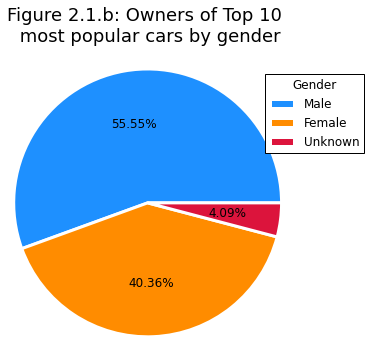

In [43]:
ttltop10.iloc[0:3].plot(kind='pie',autopct='%.2f%%', 
                        colors = ['dodgerblue','darkorange', 'crimson'],
                        wedgeprops={'linewidth':3.0, 'edgecolor': 'white'},
                        radius=1.5, fontsize=12,  labeldistance=None)
plt.ylabel('')
plt.title("Figure 2.1.b: Owners of Top 10 \n most popular cars by gender", y=1.2, fontsize=18)
plt.legend(fontsize=12, bbox_to_anchor=(1, 0.9), loc='center left', title='Gender', title_fontsize=12)
plt.show()

In [44]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values in the billions, millions and thousands to format in B, M, K respectively
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    
    new_tick_format = str(new_tick_format)
    
    
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

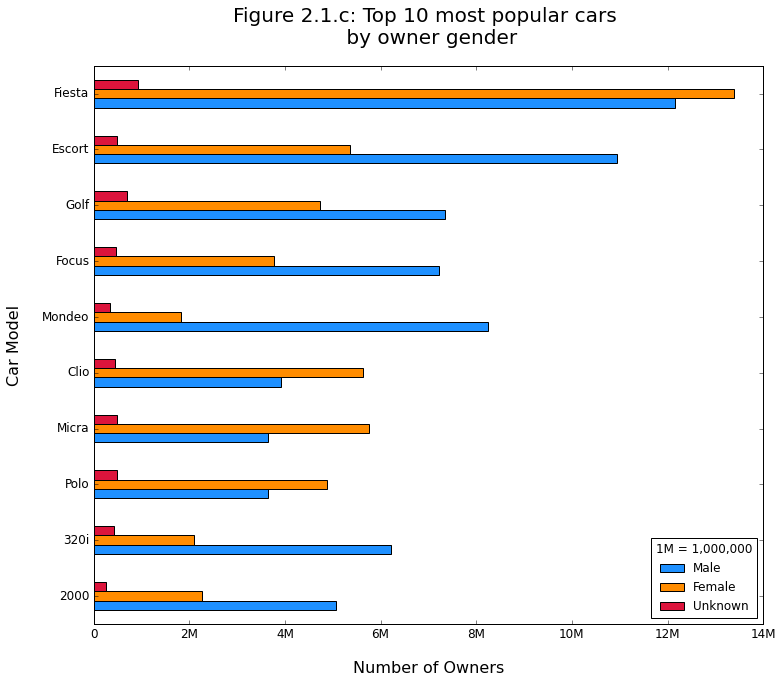

In [45]:
from matplotlib.patches import Rectangle
top10bar = (top10.sort_values(by='Total', ascending = True)
            .iloc[:-1,0:3]
            .plot(kind='barh', 
                  color = ['dodgerblue',  'darkorange', 'crimson'],
                  figsize=(12, 10), legend=True, fontsize=12)
)
plt.xlabel('Number of Owners', fontsize=16, labelpad=20)
plt.ylabel('Car Model', fontsize=16, labelpad=20)
plt.title('Figure 2.1.c: Top 10 most popular cars \n by owner gender', y=1.03, fontsize=20)
plt.legend(fontsize=12, loc='lower right', title='1M = 1,000,000', title_fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.show()

### Task 2.2 Explore the error in the Price and Power columns by visualization. <a id='22'></a>

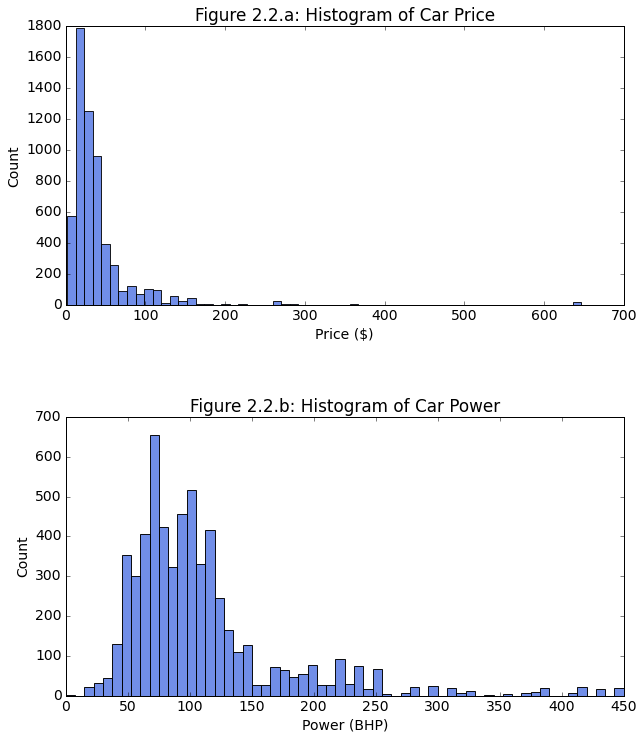

In [46]:
plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 14})
ax1 = plt.subplot(2,1,1)
ax1.set_xlabel('Price ($)')
sns.histplot(data=cleaned, x='Price', ax=ax1, bins=60, color = 'royalblue')\
.set(title='Figure 2.2.a: Histogram of Car Price')
ax2 = plt.subplot(2,1,2)
ax2.set_xlabel('Power (BHP)')
sns.histplot(data=cleaned, x='Power', ax=ax2, bins=60, color = 'royalblue')\
.set(title='Figure 2.2.b: Histogram of Car Power')
plt.subplots_adjust(hspace=0.4)

### Task 2.3 The relationship between the number of Male owners and the rest features <a id='23'></a>

In [47]:
numcol = cleaned.loc[:, cleaned.columns !='Male'].select_dtypes(include=np.number).columns.tolist()
numcol

['Price', 'Transmission', 'Power', 'Engine CC', 'Female', 'Unknown', 'Total']

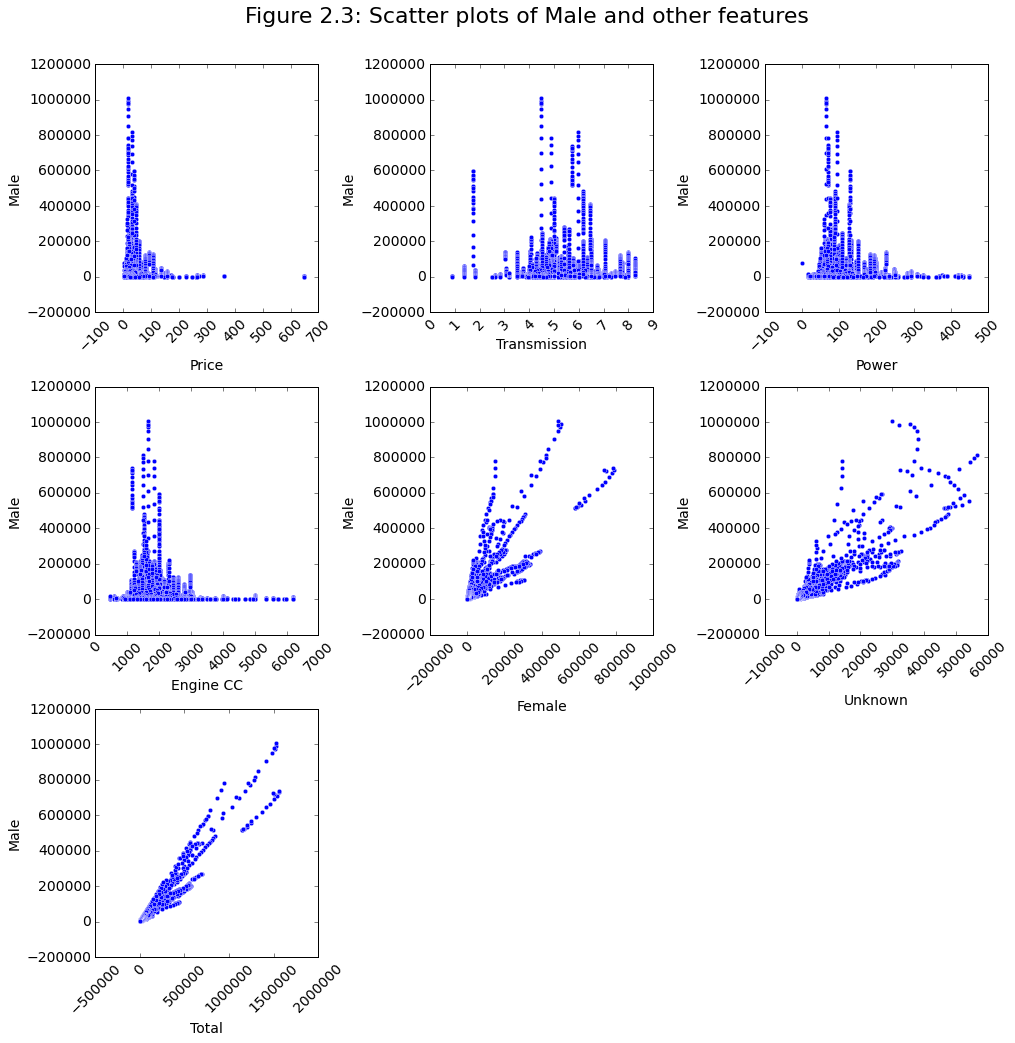

In [48]:
plt.figure(figsize=(16,16))
for i, col in enumerate(numcol):
    ax = plt.subplot(3,3,i+1)
    sns.scatterplot(data=cleaned, x=col, y='Male', ax=ax)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Male', fontsize=14)
    plt.xticks(rotation = 45)
plt.subplots_adjust(wspace= 0.5, hspace=0.3)
plt.suptitle('Figure 2.3: Scatter plots of Male and other features', y=0.95, fontsize=22)
plt.show()

In [49]:
for col in numcol:
    print('The correlation between Male and ', col, 'is: ', cleaned['Male'].corr(cleaned[col]).round(3))

The correlation between Male and  Price is:  -0.068
The correlation between Male and  Transmission is:  -0.005
The correlation between Male and  Power is:  -0.084
The correlation between Male and  Engine CC is:  -0.115
The correlation between Male and  Female is:  0.828
The correlation between Male and  Unknown is:  0.887
The correlation between Male and  Total is:  0.967
